# Jaccard-Index versus Genauigkeit

Abhängig vom Anwendungsfall sind einige Metriken suboptimal für die Bestimmung der Segmentierungsqualität. Wir demonstrieren dies, indem wir Segmentierungsergebnisse auf unterschiedlich zugeschnittenen Bildern vergleichen.

Siehe auch:
* [Maier-Hein, Reinke et al. (Arxiv 2023). Metrics reloaded: Pitfalls and recommendations for image analysis validation
](https://arxiv.org/abs/2206.01653)

In [1]:
from skimage.data import human_mitosis
from the_segmentation_game import metrics
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview

Wir verwenden den Beispieldatensatz `human_mitosis` aus scikit-image.

StackViewNDArray([[10, 11,  9, ..., 11, 11, 10],
                  [10, 10, 11, ..., 12, 12, 11],
                  [ 9,  9, 10, ..., 12, 11, 11],
                  ...,
                  [10,  9,  9, ..., 11, 12, 11],
                  [10, 10, 10, ..., 13, 12, 12],
                  [10, 10, 10, ..., 13, 13, 13]], dtype=uint8)
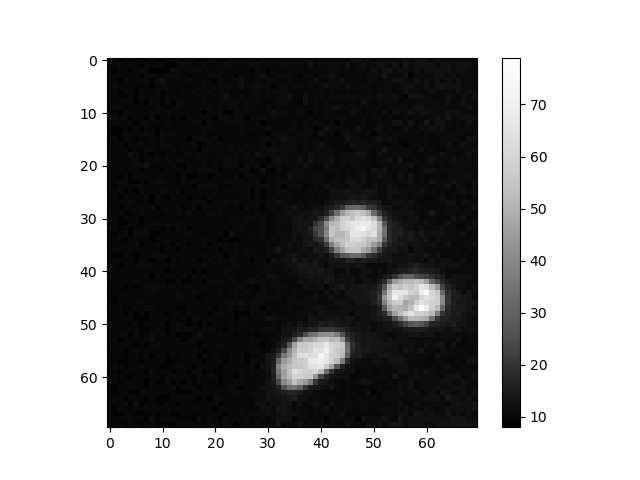
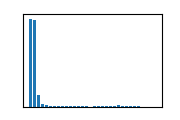

In [2]:
image = human_mitosis()[95:165, 384:454]

stackview.insight(image)

Nehmen wir an, dies ist eine Referenzannotation, die von einem Experten durchgeführt wurde.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
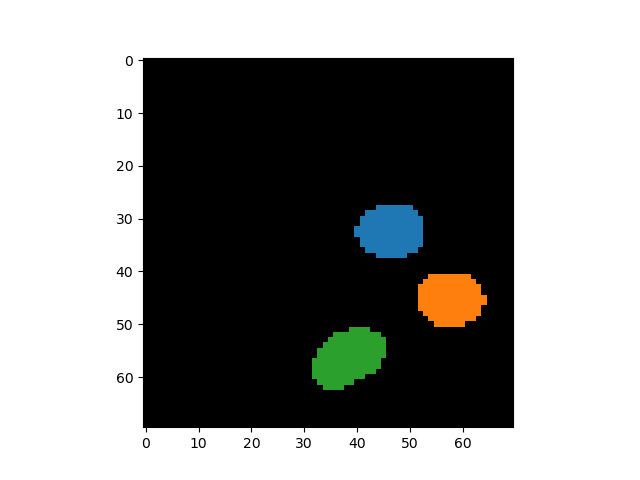

In [3]:
reference_labels = nsbatwm.voronoi_otsu_labeling(image)
reference_labels

Darüber hinaus erstellen wir ein Segmentierungsergebnis, dessen Qualität wir bestimmen möchten.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
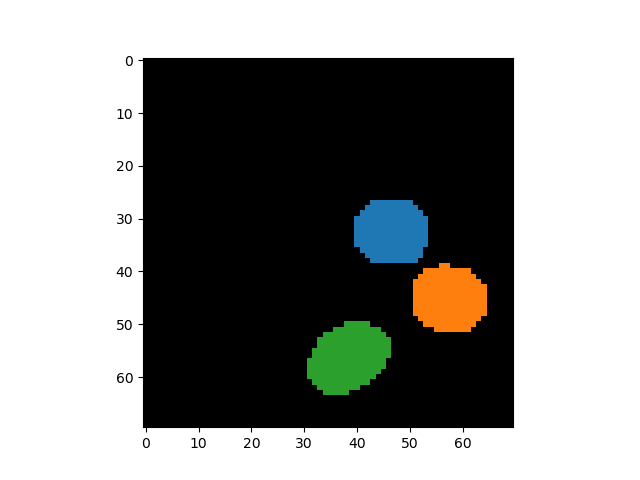

In [4]:
test_labels = nsbatwm.gauss_otsu_labeling(image, outline_sigma=3)

test_labels

## Qualitätsmessung
Es gibt zahlreiche Qualitätsmetriken zur Messung, wie gut die beiden Labelbilder zueinander passen. Im Folgenden verwenden wir [Genauigkeit und Jaccard-Index, wie sie in The Segmentation Game implementiert sind](https://github.com/haesleinhuepf/the-segmentation-game#metrics), einem napari-Plugin zur Messung von Qualitätsmetriken von Segmentierungsergebnissen.

In [5]:
metrics.roc_accuracy_binary(reference_labels, test_labels)

0.9744898

In [6]:
metrics.jaccard_index_sparse(reference_labels, test_labels)

0.7274754206261056

Wir wenden nun die gleichen Metriken erneut auf das Labelbild an, schneiden das Labelbild jedoch zu, indem wir einige der Null-Wert-Pixel oben und links im Labelbild entfernen.

In [7]:
metrics.roc_accuracy_binary(reference_labels[20:,20:], test_labels[20:,20:])

0.95

In [8]:
metrics.jaccard_index_sparse(reference_labels[20:,20:], test_labels[20:,20:])

0.7274754206261056

Wie Sie sehen können, ändert sich die Genauigkeitsmetrik, während der Jaccard-Index gleich bleibt. Offensichtlich hängt die Genauigkeitsmetrik von der Anzahl der Null-Wert-Pixel im Labelbild ab. Wir visualisieren nun die zugeschnittenen Bilder:

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
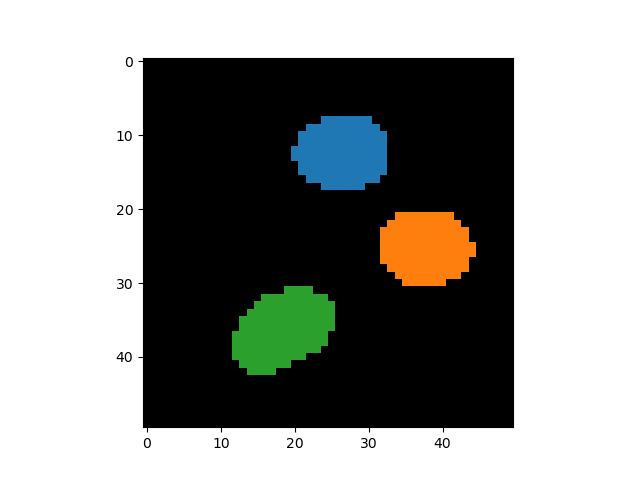

In [9]:
reference_labels[20:,20:]

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
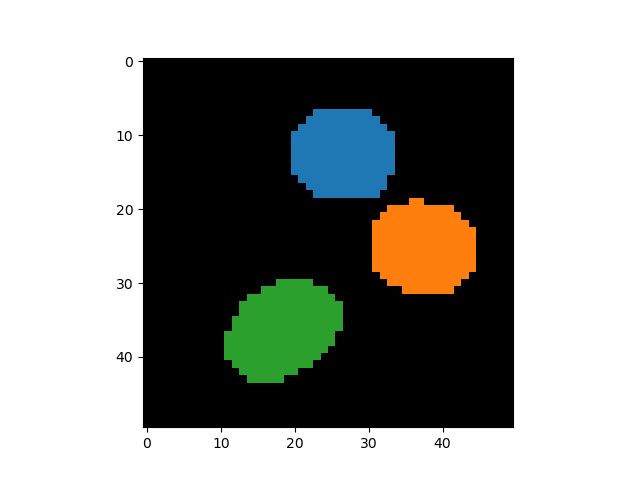

In [10]:
test_labels[20:,20:]

## Erklärung
Beim Vergleich der Gleichungen für Genauigkeit $A$ und Jaccard-Index $J$ wird deutlich, dass beide ähnliches tun, aber nur die Genauigkeit die Anzahl der Null-Wert-Pixel in beiden Labelbildern berücksichtigt. Diese Pixel sind die wahren Negativen $TN$.

$$
  A =\frac{TP + TN}{FN + FP + TP + TN}
$$

$$
  J =\frac{TP}{FN + FP + TP}
$$